# Data Acquisition and Conversion Notebook

The purpose of this notebook is to download data, convert it to npys, and relabel it to a standard labelling format.

### Run this notebook first and it will generate all the metadata for the other notebooks

In [1]:
# Import Basic Python Functionality
import numpy as np
import pandas as pd
from pytube import YouTube
from pydub import AudioSegment
import os
import io
import matplotlib.pyplot as plt
from pathlib import Path
import difflib
from StarScreamLib.functions import * #list of functions: flat(bl), i_str(i), reduce_seq(s,xlr), normalize_seq(s), xlr(lrb), pydub_to_np(audio, r_smp=44100), 
                                      #                   sequence_to_spectrogram(s,r_smp,v_res,f_len,t_len), norm_seq_to_spg(s,r_smp,v_res,f_len,t_len,filt), 
                                      #                   normalize_spectrogram(sp), quick_spectrogram(s,r_smp=44100,v_res=2**9), quick_sound(s,r_smp=44100), 
                                      #                   quick_plot(sp), quick_example(s,r_smp=44100), decimate(s,new_rate,old_rate=44100), vdir(directory)
#%matplotlib widget
%matplotlib inline
#%matplotlib notebook


# Create Important Directories
data_folder=vdir('data')
more_folder=vdir('more')

downloads_folder=vdirs(data_folder,'downloads')
npys_folder=vdirs(data_folder,'npys')
metadata_folder=vdirs(data_folder,'metadata')

time_series_npys_folder=vdirs(npys_folder,'time_series_audio_npys')
audio_set_npys_folder=vdirs(npys_folder,'audio_set_npys')
drone_npys_folder=vdirs(npys_folder,'drone_audio_npys')
AA_npys_folder=vdirs(npys_folder,'AA_npys')

time_series_downloads_folder=vdirs(downloads_folder,'time_series_audio_mp4s') #long time-series mp4 files go in here
audio_set_downloads_folder=vdirs(downloads_folder,'audio_set_mp4s') #short mp4 files from google's AudioSet data go here
drone_downloads_folder=vdirs(downloads_folder,'drone_audio_wavs') #download from github
AA_downloads_folder=vdirs(downloads_folder,'AA_raw')

data_collector_folder=vdirs(metadata_folder,'data_collector')

dcj=lambda f:os.path.join(data_collector_folder,f)
mdj=lambda f:os.path.join(metadata_folder,f)

# General-use data organizing functions
def vtimes(times,lengths): #verifies and fixes the times so that no obvious errors are left
    for i in range(len(times)):
        for j in range(len(times[i])):
            [tmp_ll,tmp_ul]=times[i][j] #upper and lower limits are the event time tags (in samples)
            if tmp_ll>tmp_ul: #if our lower limit is greater than the upper limit
                tmp_ll,tmp_ul=tmp_ul,tmp_ll #flip them
            if tmp_ul>lengths[i]: #if the true upper limit goes beyond the length of our file
                tmp_ul=lengths[i] #set it equal to the length of the file
            times[i][j]=[tmp_ll,tmp_ul]
            
def get_lengths(numpy_files):
    return [len(np.load(f)) for f in numpy_files]

# Manually Labeled Youtube Time-Series Data

## Download and Convert

We download several mp4 audios from youtube and then convert them to npy files

Finished Decimation                                                                                         
Demo:


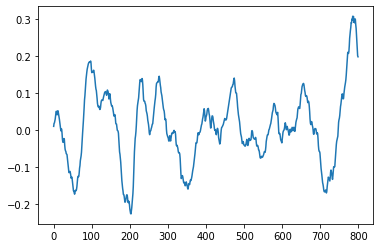

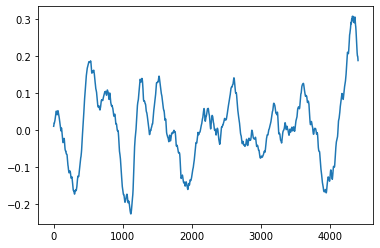

In [2]:
pdict = {}
pdict['r_smp'] = 44100

vidLnk = {}
#unlabeled data
#vidLnk['Haneda_Airport'] = "https://www.youtube.com/watch?v=tyD-i1u8f5g"
#vidLnk['Chitose_Airport'] = "https://www.youtube.com/watch?v=PxRwSvBeEvA"
#vidLnk['Narita_Airport'] = "https://www.youtube.com/watch?v=TGhl84_TUnU"
#vidLnk['Funchal_Airport'] = "https://www.youtube.com/watch?v=5RfiTxR9-d8"
#vidLnk['Lisbon_Airport'] = "https://youtu.be/Z7CutgNEMfA"
#vidLnk['Brussels_Airport'] = "https://youtu.be/CaiFfQTdRz0"
#vidLnk['Amsterdam_Airport_2'] = "https://youtu.be/1ll4mumGBxk"
#vidLnk['Zurich_Airport'] = "https://youtu.be/aTyQ4fJtwhc"

#labeled data
vidLnk['Houston_Airport'] = "https://www.youtube.com/watch?v=dNTv7g1f5S0"
vidLnk['Amsterdam_Airport_1'] = "https://www.youtube.com/watch?v=f_74vfnFRzk"
vidLnk['Berlin_Airport'] = "https://youtu.be/fPzpohpnW5Y"

Australia_Playlist=['https://youtu.be/HtvHMwrbi6A','https://youtu.be/LdiVcNy5r2U','https://youtu.be/VYzj1JeLyPQ','https://youtu.be/sOHzKgiF_-Q','https://youtu.be/xCCXFWC8wNw',
                    'https://youtu.be/6NGCjCWK9qY','https://youtu.be/3YeSDfpKKo4','https://youtu.be/PjeJBfj5ADI','https://youtu.be/2elG6bZwJns','https://youtu.be/LQNdgp-3ibE',
                    'https://youtu.be/FgK0IoFRw8k','https://youtu.be/dnDOfgtSpoU','https://youtu.be/DG8ZVGQCTeo','https://youtu.be/JmW3Sdy19b4','https://youtu.be/1bq6FBms7qI',
                    'https://youtu.be/56d5HRXXNvU','https://youtu.be/eU3nT8Fz5AI','https://youtu.be/YGwIlSdnUlk','https://youtu.be/xDavqH5AC4k','https://youtu.be/SoPW6J2mlz0',
                    'https://youtu.be/HG4VMGPNPZ0','https://youtu.be/yuoRtS-dmMY','https://youtu.be/YtzYUmKMh7Y','https://youtu.be/VQ7kupQZOtY','https://youtu.be/eLpO--xizps',
                    'https://youtu.be/VrLlDCyrI-E','https://youtu.be/6bUJjwy1kSw','https://youtu.be/bbQwYwTyS7g','https://youtu.be/BjhQqPh2KWk','https://youtu.be/hAi293xPRqI',
                    'https://youtu.be/eCF5gBNRrIM','https://youtu.be/yoIyYDzgPMo','https://youtu.be/JQRessxoZWE','https://youtu.be/ZZuXyjHshtI','https://youtu.be/kTj5smEONDE',
                    'https://youtu.be/Qo1RGT0ljMw']
for i in range(len(Australia_Playlist)):
    vidLnk['Australia_Playlist_'+i_str(i)] = Australia_Playlist[i]

vidLnk['B777_Engine'] = "https://youtu.be/sJqtrj5OrKI"
vidLnk['F-16_Engine_0'] = "https://youtu.be/Oj4w7i-TqsE"
#vidLnk['a380_landings'] = "https://youtu.be/eXai0lFrPSs" #a video of just a380 landings
outfiles = []

for video_name in vidLnk:
    video_link = vidLnk[video_name]
    video_file = os.path.join(time_series_downloads_folder, video_name+'.mp4')
    audio_file = os.path.join(time_series_npys_folder, video_name+f'_{pdict["r_smp"]}.npy')
    outfiles.append(audio_file)
    print(f'{video_name}:', end='\r')
    
    if not os.path.exists(video_file):
        print(f'Downloading...', end='\r')
        video = YouTube(video_link)
        audio = video.streams.filter(only_audio=True, file_extension='mp4').first()
        audio.download(filename=video_file)
        print('Complete!    ', end='\r')
    else:
        print('Already Downloaded!', end='\r')            
            
    if (os.path.exists(video_file)) & (not os.path.exists(audio_file)):
        print(f'Converting...', end='\r')
        seg = AudioSegment.from_file(video_file, format="mp4")
        samples = pydub_to_np(seg, pdict['r_smp'])
        np.save(audio_file, samples)
        print('Complete!   ', end='\r')
    else:
        print("Already Converted!   ", end='\r')

print("Starting Decimation                                                                                         ",end='\r')


#Decimation Station
new_sample_rate=8000

old_npys=[os.path.join(time_series_npys_folder,f) for f in os.listdir(time_series_npys_folder) if f.split('_')[-1].split('.')[0]=='44100']
resampled_npys=[f.replace('44100',str(new_sample_rate)) for f in old_npys]
for i in range(len(resampled_npys)):
    if not os.path.exists(resampled_npys[i]):
        print(str(int(100*i/len(resampled_npys)))+'% done',end='\r')
        np.save(resampled_npys[i],decimate(np.load(old_npys[i]),new_sample_rate))
print('Finished Decimation      \nDemo:')

#Here's a small demo of the decimation
t=5
l=0.1
r1,r2=8000,44100
old_ts=np.load(os.path.join(time_series_npys_folder,"Australia_Playlist_00_44100.npy"))
new_ts=np.load(os.path.join(time_series_npys_folder,"Australia_Playlist_00_8000.npy"))
plt.plot(new_ts[int(r1*t):int(r1*(t+l))][:,0]); plt.show()
plt.plot(old_ts[int(r2*t):int(r2*(t+l))][:,0]); plt.show()

## Time-Series Metadata

Now we take collected data and convert it to readable metadata (see https://github.com/danrabayda/DataCollector for more info on collection using pytesseract OCR)

Here we now want to convert every label into a standardized labelling method i.e. A380 = Airbus A-380 = A-380 and for highly specified uniqueness of aircraft with slight differences from listed ones we can set them equal i.e. B-777-300LR = B-777-300ER. We have all the individual label csvs as well as a key reference csv called aircraft_weight_classes.csv that contains many more labelling features of these aircraft like weight classes, number of engines, types of engines, etc.

In [3]:
#Necessary Functions
def time_str_to_secs(time_str): #changes time from "MM:SS" to it's value in seconds (starting at 00:00)
    tmp_t=np.array(time_str.split(':')).astype('int')
    return tmp_t[0]*60+tmp_t[1]

def isnumber(st):
    try:
        int(st.split('-')[0])
        return True
    except:
        return False

def isword(st): #returns true if a string is all alphabetic characters
    alphabet=['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','z','y']
    c,ll=0,len(st)
    for alph in st.lower():
        if alph in alphabet:
            c+=1
    return c==ll

def strs_to_labels(str_arr,ci=0,first_word=False): #takes in list of strings and outputs the first sequence of each that is not a word
    labels=[]
    for st in str_arr: #now loop through the "label" strings and pull out the first thing in that string that is not a word
        st_sp=st.split(' ') #break up the string by spaces
        c,alph=ci,'a' #ci is initial c, if we want to start at a different word in a string set ci higher, alph is just some alphanumeric word and isword will check if it is a word
        while isword(alph): #loop through all the segments of a string delimited by spaces and pull out the first thing that's not 100% alphabetic
            if c>=len(st_sp):
                alph='_'
            else:
                alph=st_sp[c]
            c+=1
        if isnumber(alph[0]): #If our str looks like this Boeing 777 we want it to become B777 not just 777 so we add this part in
            ind=c-2
            if first_word: ind=0
            alph=st_sp[ind][0]+alph
        labels.append(alph)
    return labels

def relabeler(labels,pre_st='',to_remove=['F','N','neo','LR']): #to get rid of things like A330neo since it is mostly the same as the A330
    labels_out=[]
    for lb in labels:
        tmp=lb
        if pre_st in lb[:1]:
            for si in to_remove:
                if si in lb:
                    tmp=lb.split(si)[0]
        labels_out.append(tmp)
    return labels_out

def label_replacer(labels,replace_dict={'A530':'A330','A580':'A380','A550':'A350','AZ30':'A330','AZ21':'A321'}): #because sometimes the screen recorder messes up on predictable characters
    for i in range(len(labels)):
        if labels[i] in list(replace_dict):
            labels[i]=replace_dict[labels[i]]
    return labels

def full_relabel(labels): #relabel several times based on first character, i.e. relabel just boeing so that we remove the F from B737F but not have it affect Airbus A320F for example
    return label_replacer(relabeler(relabeler(labels,pre_st='A',to_remove=['F','neo','-']),pre_st='E',to_remove=['-','LR']))

def generate_rough_dict(unique_a_labels,unique_w_labels,delim=',\n'): #generates a roughly matching dictionary from a given set of labels to the weight labels formatting
    for a in unique_a_labels:
        mt=difflib.get_close_matches(a,unique_w_labels,n=3)
        if len(mt)==0: 
            print('"'+a+'":"'+''+'"',end=delim) 
        elif a==mt[0]:
            print('"'+a+'":"'+mt[0]+'"',end=delim) 
        else:
            mt=difflib.get_close_matches(a.split('-')[0],unique_w_labels,n=3)
            if len(mt)==0: 
                print('"'+a+'":"'+''+'"',end=delim) 
            else:
                print('"'+a+'":"'+mt[0]+'"',end=delim)
                
def weight_info_extractor(labels,dicti,w_info,w_labels,ind): #assigns weights and weight classes to a given set of labels using dicti to translate from labels to the raw weight labels
    w=[]
    for l in labels:
        tmp_i=np.where(np.array(w_labels)==dicti[l])[0][0]
        w.append(w_info[:,ind][tmp_i])
    return w

def weight_info_gather(labels,dicti,w_info,w_labels,inds):
    return [weight_info_extractor(labels,dicti,w_info,w_labels,ind) for ind in inds]
    

### Berlin, Amsterdam, and Houston

In [4]:
#These are the datafile lengths
[l_houston,l_berlin,l_amsterdam] = [3675, 3231, 7199]

#import label data
houston_times_labels=pd.read_csv(dcj('HoustonLabels.csv'))[['start','stop','plane']].to_numpy()
berlin_times_labels=pd.read_csv(dcj('BerlinLabels.csv')).to_numpy() #Times, Str, Aircraft
amsterdam_times_labels=pd.read_csv(dcj('AmsterdamLabels.csv'))[['Raw Times(s)','Aircraft']].to_numpy()

#format times
houston_times=[[time_str_to_secs(time) for time in times] for times in houston_times_labels[:,:2]]
berlin_times=berlin_times_labels[:,0]
berlin_times=[time_str_to_secs(tm) for tm in berlin_times]+[l_berlin] #reformat into samples (also have to add the final time
berlin_times=[[berlin_times[i],berlin_times[i+1]] for i in range(len(berlin_times)-1)] #reformat so the time is a pair with the end of one tag at the start of the next tag
amsterdam_times=amsterdam_times_labels[:,0]
amsterdam_times=[[amsterdam_times[i],amsterdam_times[i+1]] for i in range(len(amsterdam_times)-1)]+[[amsterdam_times[-1],l_amsterdam]]

#format actual labels
houston_labels=houston_times_labels[:,2]
berlin_labels=strs_to_labels(berlin_times_labels[:,1],ci=2)
#berlin_labels=[label.split('-')[0] for label in berlin_labels]
amsterdam_labels=strs_to_labels(amsterdam_times_labels[:,1])
amsterdam_labels=[label.split('(')[0] for label in amsterdam_labels] #here I make the decision to throw away the additional identifiers, i.e. A330-200 -> A330
houston_labels,berlin_labels,amsterdam_labels=full_relabel(houston_labels),full_relabel(berlin_labels),full_relabel(amsterdam_labels)

#Import Weights Data
weight_raw_labels=pd.read_csv(dcj('aircraft_weight_classes.csv'))[['type-[]','MTOW [kg]','ICAO category','FAA category','total engines','engine type']].to_numpy()
weight_labels=strs_to_labels(weight_raw_labels[:,0],first_word=True)
weight_labels=full_relabel(weight_labels)

#extract additional alternate labels from the weight info:
h_to_w_dict={"A220":"A220","A300":"A300","A319":"A319","A320":"A320","A320N":"A320","A321":"A321","A350":"A350","A380":"A380","B737":"B737-300","B747F":"B747-8F","B767":"B767-300","B767F":"B767-300","B777":"B777F","B777F":"B777F","CRJ1000":"CRJ-1000","CRJ200":"CRJ-200","CRJ900":"CRJ-900","E145":"E145","E175":"E175","E190":"E190","MD80":"McDonnell-Douglas","tiny":"E100"}
b_to_w_dict={"A318":"A318","A319":"A319","A320":"A320","A321":"A321","A330":"A330","B737-800":"B737-800","B737-900":"B737-900","B767-300ER":"B767-300ER","B787-8":"B787-8","E190":"E190","E195":"E195"}
a_to_w_dict={"A300":"A300","A310":"A310","A318":"A318","A319":"A319","A320":"A320","A321":"A321","A330":"A330","A350":"A350","A380":"A380","B737":"B737-300","B737-700":"B737-700","B737-800":"B737-800","B747-400F":"B747-400","B747-8F":"B747-8F","B767-300ER":"B767-300ER","B767-300F":"B767-300","B777-200ER":"B777-200ER","B777-300ER":"B777-300ER","B777F":"B777F","B787-10":"B787-10","B787-8":"B787-8","B787-9":"B787-9","CRJ-1000":"CRJ-1000","CRJ-1000EL":"CRJ-1000EL","CRJ-900ER":"CRJ-900","CRJ-900LR":"CRJ-900","Dash-8-Q400":"Dash-8-Q400","E175":"E175","E190":"E190","E195":"E195"}

w_inds=[1,3,4,5]
h_weight_info = weight_info_gather(houston_labels,h_to_w_dict,weight_raw_labels,weight_labels,w_inds)
b_weight_info = weight_info_gather(berlin_labels,b_to_w_dict,weight_raw_labels,weight_labels,w_inds)
a_weight_info = weight_info_gather(amsterdam_labels,a_to_w_dict,weight_raw_labels,weight_labels,w_inds)

#compile everything into data frames and save them to csvs
headers=["labels","start","stop","weight","w_class","tot_engines","engine_type"]
to_df=lambda l:pd.DataFrame({headers[i]:l[i] for i in range(len(l))})
t_split=lambda t:[np.array(t)[:,0],np.array(t)[:,1]]
houston_df=to_df([houston_labels]+t_split(houston_times)+h_weight_info)
berlin_df=to_df([berlin_labels]+t_split(berlin_times)+b_weight_info)
amsterdam_df=to_df([amsterdam_labels]+t_split(amsterdam_times)+a_weight_info)

houston_df.to_csv(dcj('houston.csv'),index=False)
berlin_df.to_csv(dcj('berlin.csv'),index=False)
amsterdam_df.to_csv(dcj('amsterdam.csv'),index=False)

#check_missing = lambda d,l,e:[d[k] for k in np.unique(np.array(l)[np.where(np.isnan(np.array(e)))])]
#np.unique(flat([check_missing(a_to_w_dict,amsterdam_labels,amsterdam_engines),check_missing(b_to_w_dict,berlin_labels,berlin_engines),check_missing(h_to_w_dict,houston_labels,houston_engines)]))

### Australia

In [5]:
Australia_info=pd.read_csv(dcj('Hours_of_Australia.csv'))
flat = lambda na:[v for a in na for v in a] #flattens a list of lists into just a list

raw_sts=Australia_info[['video']].to_numpy().astype('str')
sep_inds=[i for i in range(len(raw_sts)) if raw_sts[i][0]!='nan' and raw_sts[i][0][0]!='h']+[len(raw_sts)] #a!='nan'

Australia_Times=[flat(Australia_info[['Labeled Time(s)']][sep_inds[i]:sep_inds[i+1]].to_numpy().astype('int')) for i in range(len(sep_inds)-1)]
Australia_vid_lengths=flat(Australia_info[['video lengths(s)']][:36].to_numpy().astype('int')) #-1 just incase the videos are not actually as long as they say
for i in range(len(Australia_Times)):
    Australia_Times[i].append(Australia_vid_lengths[i]) #add the video length to the end of each times list
Australia_Times=[[[tl[i],tl[i+1]] for i in range(len(tl)-1)] for tl in Australia_Times] #rewrite times as start and stop times instead

Australia_Labels=[flat(Australia_info[['Labels']][sep_inds[i]:sep_inds[i+1]].to_numpy().astype('str')) for i in range(len(sep_inds)-1)]
Australia_Labels=[strs_to_labels(lbls) for lbls in Australia_Labels]
Australia_Labels=[full_relabel(lbls) for lbls in Australia_Labels]

#dict made using unique_aus_labels=np.unique(flat(Australia_Labels)).tolist();unique_w_labels=np.unique(weight_labels).tolist();generate_rough_dict(unique_aus_labels,unique_w_labels)
aus_to_w_dict={"A319":"A319","A320":"A320","A321":"A321","A330":"A330","A340":"A340","A350":"A350","A380":"A380","A72":"A72","AN":"An","B717-200":"B717-200BGW","B737":"B737-300","B737-300":"B737-300","B737-300F":"B737-300","B737-400F":"B737-400","B737-700":"B737-700","B737-700BBJ":"B737-700","B737-800":"B737-800","B737-900":"B737-900","B737F":"B737-300","B747":"B747-8","B747-400":"B747-400","B747-400ER":"B747-400ER","B747-400F":"B747-400ER","B747-8F":"B747-8F","B747F":"B747-8F","B757-200":"B757-200","B757-200F":"B757-200","B757F":"B757-200","B767":"B767-300","B767-300":"B767-300","B767-300ER":"B767-300ER","B767-300ERF":"B767-300ER","B767-300F":"B767-300ER","B767-30F":"B767-300ER","B767F":"B777F","B777":"B777F","B777-200":"B777-200ER","B777-200ER":"B777-200ER","B777-200F":"B777-200ER","B777-200LR":"B777-200LR","B777-300":"B777-300","B777-300ER":"B777-300ER","B777F":"B777F","B787":"B787-9","B787-10":"B787-10","B787-8":"B787-8","B787-800":"B787-8","B787-9":"B787-9","B787=9":"B787-9","BAe-146-200QTF":"BAE-146","BAe-146-300QTF":"BAE-146","C-130J":"C-130J","C-17":"C-17","D8":"Dash-8-Q400","DC-3":"DC-4","Dash-8":"Dash-8-Q400","E170":"E170","E190":"E190","F100":"F100","G6000":"G6000","IL-76":"IL-76","KC-30":"KC-30","MD-11F":"McDonnell-Douglas","RAAFFalcon7x":"RAAFFalcon7x","RJ-100":"RJ-100","S340":"S340"}

Australia_weight_info=[[weight_info_extractor(lbls,aus_to_w_dict,weight_raw_labels,weight_labels,ind) for lbls in Australia_Labels] for ind in w_inds]

Australia_dfs=[to_df([Australia_Labels[i]]+t_split(Australia_Times[i])+[w[i] for w in Australia_weight_info]) for i in range(len(Australia_Labels))]
for i in range(len(Australia_dfs)):
    Australia_dfs[i].to_csv(dcj('Australia_'+str(i)+'.csv'),index=False)

# Google's Audio Set Metadata

### Make sure to run download.py first (takes several hours in background)

Here we similarly convert the 8000 or so youtube mp4s to npys then load up and match them to their respective classes

In [6]:
pdict = {}
pdict['r_smp'] = 44100

video_files=np.sort(os.listdir(audio_set_downloads_folder))
for i,video_file in enumerate(video_files):
    print(int(100*i/len(video_files)),"% converting      ",end='\r')
    video_name=''.join(video_file.split('.')[:-1])
    audio_file = os.path.join(audio_set_npys_folder, video_name+f'_{pdict["r_smp"]}.npy')
    if not os.path.exists(audio_file):
        try:
            seg = AudioSegment.from_file(audio_set_downloads_folder+'/'+video_file, format='mp4')
            samples = pydub_to_np(seg, pdict['r_smp'])
            np.save(audio_file, samples)
        except:
            print("\nError with "+video_name+"\n")  # to handle exception   
print("100 % converted      ")
test_numpy_files = [os.path.join(audio_set_npys_folder, f) for f in os.listdir(audio_set_npys_folder) if Path(f).suffix == '.npy']

100 % converted      


Let's first import and format the labels.

We weren't able to download some videos so we also need to remove the discrepancies.

Wherever we are missing an physical copy of the file let's pop it from the metadata

- the reason we have to do this is because we loaded all the labels correctly but they don't correspond exactly to the files in our drive because of skipped downloads. To fix this we line up the files and labels directly from the csv and compare it with our current download directory contents and pop the nonexistent files and labels simultaneously.

In [7]:
#Import and format labels and times:
as_files_labels_times = pd.read_csv(mdj('clean_download.csv'))[['segment_id','name','time_interval']].to_numpy().tolist()
pull_filenames=lambda files_labels_times:[os.path.join(audio_set_npys_folder,np.array(files_labels_times)[:,0][i]+'_'+str(pdict['r_smp'])+'.npy') for i in range(len(files_labels_times))] #all the filenames straight from the csv

def pop_nonexistent(files_labels_times,actual_files,pops_file='as_pop_arr.npy',lengths_file='as_file_lengths.npy'):
    if os.path.exists(mdj(pops_file)): #if we've already done it then just load what we did last time
        pop_arr=np.load(mdj(pops_file))
        lengths=np.load(mdj(lengths_file))
        [files_labels_times.pop(i) for i in pop_arr]
    else: #goes line by line, if a file is missing from our actual_files it pops it from files_labels_times and all our other formatted lists together
        attempted_files=pull_filenames(files_labels_times)
        pop_arr=[i for i,f in enumerate(attempted_files) if not f in actual_files]
        pop_arr.reverse()
        [files_labels_times.pop(i) for i in pop_arr]
        assert len(files_labels_times)==len(actual_files) #if this raises an error then something is not in the correct order (check the sorting of as_files and test_numpy_files)
        lengths=get_lengths(pull_filenames(files_labels_times))
        np.save(mdj(pops_file),pop_arr)
        np.save(mdj(lengths_file),lengths)
    
    return np.array(files_labels_times), lengths

as_files_labels_times, as_lengths = pop_nonexistent(as_files_labels_times,test_numpy_files)

as_files=pull_filenames(as_files_labels_times) #all the filenames straight from the csv
as_labels_raw=[as_files_labels_times[:,1][i][1:-1].replace(' ','').replace("'","").split(',') for i in range(len(as_files_labels_times))] #preformatting everything so it all fits nicely in python
as_times_str=[as_files_labels_times[:,2][i].replace(' ','').replace('(','').replace(')','').strip('][').split(',') for i in range(len(as_files_labels_times))]
as_times=[[[int(float(tlist[i])*pdict['r_smp']),int(float(tlist[i+1])*pdict['r_smp'])] for i in range(len(tlist)//2)] for tlist in as_times_str] #as_times is now preformatted into time in samples
vtimes(as_times,as_lengths)

as_files_tosave=[f.split('/')[-1] for f in as_files]
np.save(mdj('as_metadata.npy'),np.array([as_files_tosave,as_labels_raw,as_times,as_lengths],dtype='object'))

# Drone Audio Metadata

Here we are just converting the drone audio data from this dataset https://github.com/saraalemadi/DroneAudioDataset

In [8]:
pdict={}
r_smp = 16000

#Convert to npys and save all the drone files
drone_wav_files=[[os.path.join(root,file) for file in np.sort(files)] for root,dirs,files in os.walk(drone_downloads_folder) if files!=[]] #make a list of the wav files
drone_wav_files=drone_wav_files[:3]
tmp_path=os.path.join(drone_downloads_folder,"Multiclass_Drone_Audio")
[vdir(folder) for folder in [root.replace(tmp_path,drone_npys_folder) for root,dirs,files in os.walk(tmp_path)]] #create all the new npy directories 
drone_npy_files=[[f.replace(tmp_path,drone_npys_folder).replace('.wav','.npy') for f in sd] for sd in drone_wav_files] #make new npy filenames
for i in range(len(drone_wav_files)): #Convert the wavs to npys
    if not os.path.exists(drone_npy_files[i][-1]):
        for j in range(len(drone_wav_files[i])):
            seg = AudioSegment.from_file(drone_wav_files[i][j], format="wav")
            samples = pydub_to_np(seg, r_smp)
            np.save(drone_npy_files[i][j], samples)

drone_classes=["Unknown","Bebop","Membo"]

#Load the new npy files and label them according to their parent directory
def dlt(drone_npys,lbl):
    ln_=[len(np.load(f)) for f in drone_npys]
    l_=[[lbl] for f in drone_npys]
    t_=[[[0,ln]] for ln in ln_] #make the event times just the length of each file
    return ln_,l_,t_
ln__,l__,t__=[],[],[]
for i in range(len(drone_npy_files)):
    ln_i_,l_i_,t_i_ = dlt(drone_npy_files[i],drone_classes[i])
    ln__.extend(ln_i_); l__.extend(l_i_); t__.extend(t_i_)
drone_lengths, drone_labels, drone_times = ln__, l__, t__ #shuffler(d__), shuffler(l__), shuffler(t__)

np.save(mdj('drone_metadata.npy'),np.array([flat(drone_npy_files),drone_labels,drone_times,drone_lengths],dtype='object'))